# Objective:

### In this Project we will we will be classifying three types of Iris flower species using SVM and Decision Tree architectures based on the features of Iris flower and compare the accuracies of both the architectures.

# Dataset: [Iris Dataset](https://www.kaggle.com/datasets/uciml/iris)

### This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length.

### Importing the necessary packages

In [1]:
import numpy as np # linear algebra
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Lets load the dataset

In [2]:
iris = pd.read_csv("Iris.csv") #load the dataset


In [3]:
iris.head(2) #show the first 2 rows from the dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Some Exploratory Data Analysis With Iris

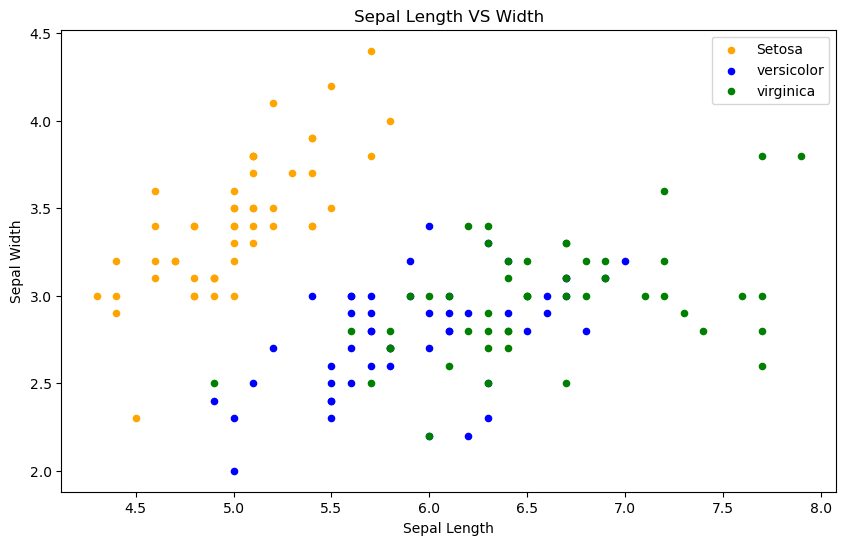

In [5]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


## The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

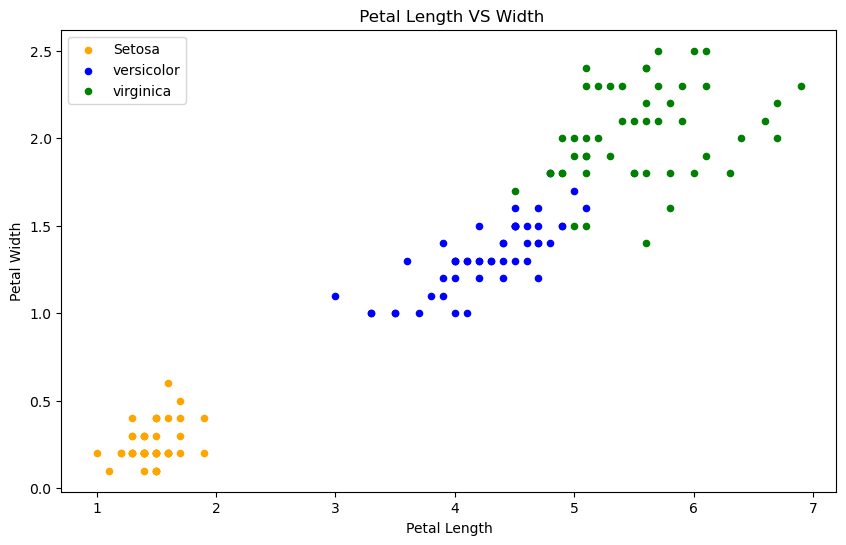

In [6]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

## Now let us see how are the length and width are distributed¶


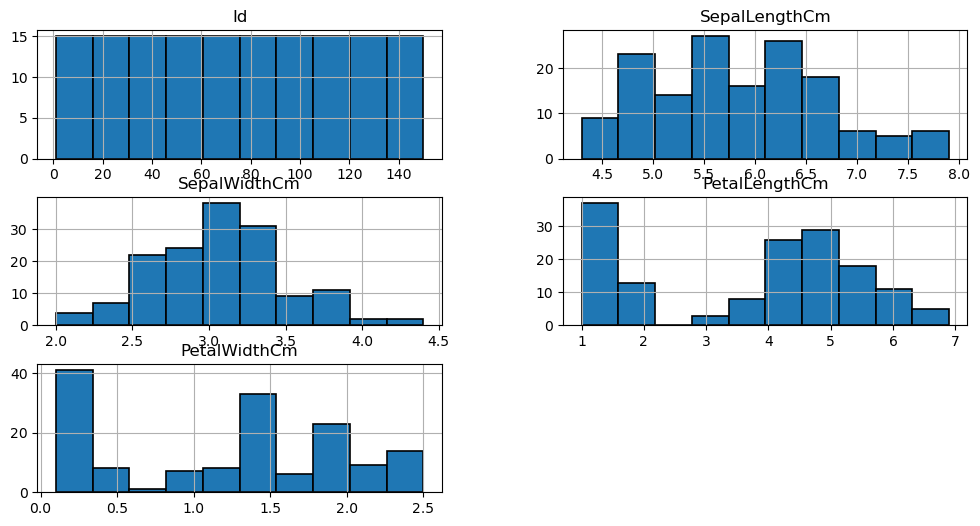

In [7]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Now let us see how the length and width vary according to the species¶


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

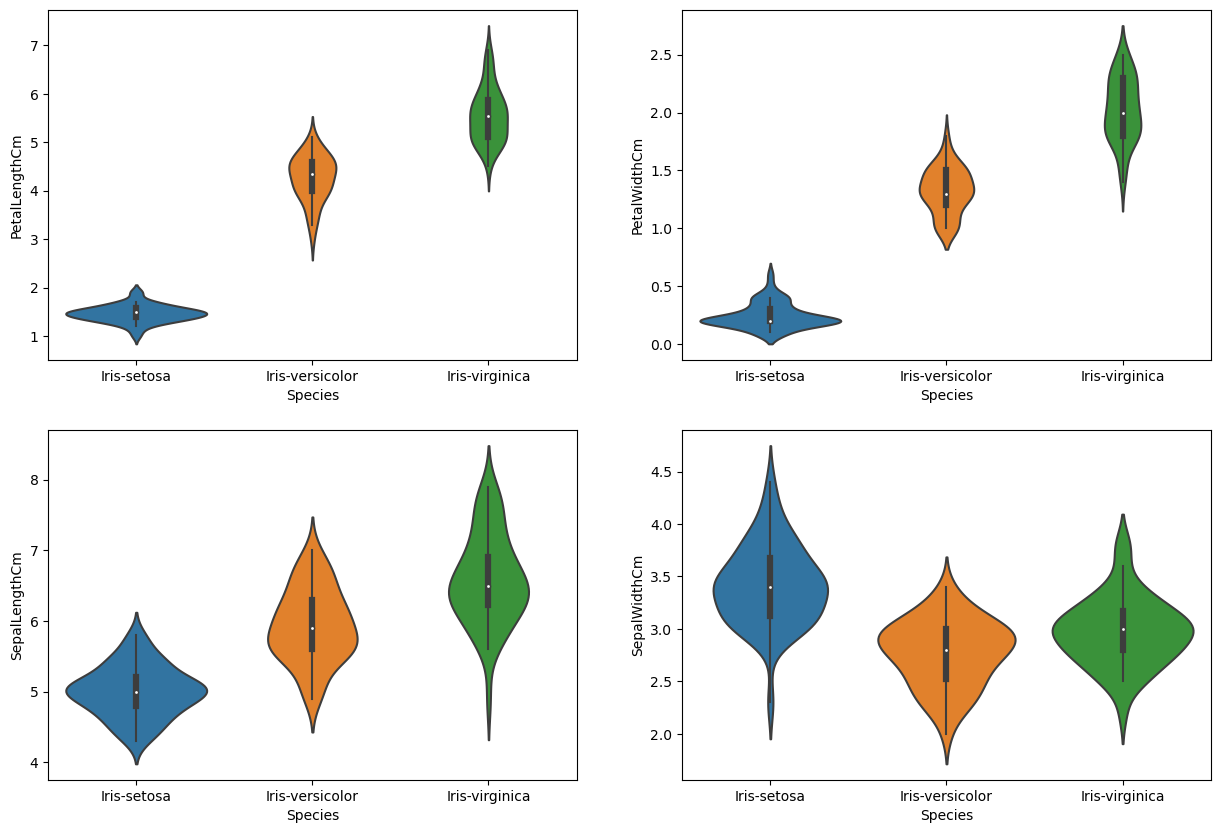

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)


### The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density 

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight. 

### Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species. 


## Now lets import the necessary packages to use the various classification algorithms

In [9]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm


In [10]:
iris.shape #get the shape of the dataset

(150, 6)

In the above output 150,5 shows that the dataset has 150 rows and 5 columns 

### Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

 

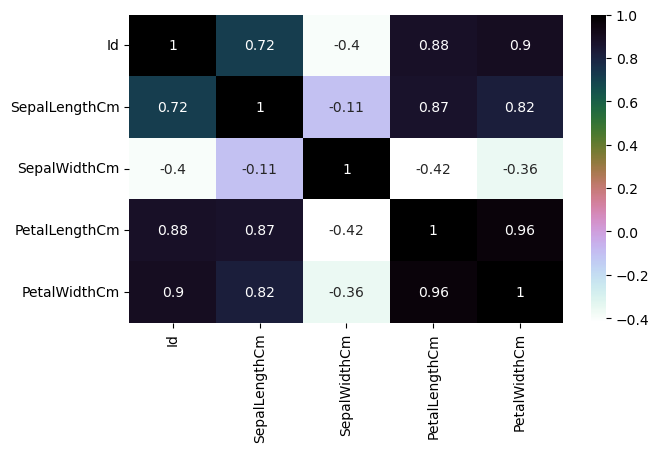

In [11]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm
Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model. 

In [12]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


We split the dataset in 7:3 ratio i.e, we assigned 70% of data to traning and 30% to testing which gave the output as 105,45.

### Now we will assign the training data features and their outputs to variables. 

In [13]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data


### Lets check the Train and Test Dataset

 

In [14]:
train_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
131,7.9,3.8,6.4,2.0
91,6.1,3.0,4.6,1.4


In [15]:
test_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,5.8,2.7,5.1,1.9
73,6.1,2.8,4.7,1.2


In [16]:
train_y.head()  ##output of the training data


131     Iris-virginica
91     Iris-versicolor
99     Iris-versicolor
129     Iris-virginica
35         Iris-setosa
Name: Species, dtype: object

The LabelEncoder class is used to convert the class labels, which are in the form of strings to integers. The fit_transform method is used to fit the encoder to the training data and then transform the training data. The transform method is then used to apply the same transformation to the test data.

The transformed labels are then passed to the fit method of the model, so the model is trained on the transformed labels.

Then, you can use the predict method of the model to make predictions on new data and evaluate the performance of the model using accuracy score or other evaluation metric of your choice.

In [19]:
pip install xgboost

  Using cached xgboost-1.7.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
# Initialize LabelEncoder
le = LabelEncoder()

# Convert class labels to integers
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

# Initialize the model
model = XGBClassifier()

# Fit the model on the training data
model.fit(train_X, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### XGBoost (eXtreme Gradient Boosting) is an open-source implementation of gradient boosting that is designed for speed and performance. XGBoost is an implementation of the gradient boosting framework that can be used for both regression and classification problems.

XGBClassifier is a class in the xgboost library that is used for training and making predictions using the XGBoost algorithm for classification problems. It takes in several parameters such as learning_rate, max_depth, n_estimators etc to control the training process.

It uses a technique called gradient boosting to iteratively improve the predictions of a model by adding new trees to the ensemble, where each tree aims to correct the mistakes of the previous trees. It also includes a regularization term called "L1" and "L2" to control overfitting.

XGBoost is widely used in many winning solutions in machine learning competitions such as Kaggle, and it is considered to be one of the most powerful and flexible libraries for gradient boosting.

- Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

In [21]:

# Initialize the model
model = XGBClassifier()

# Fit the model on the training data
model.fit(train_X, train_y)

# Make predictions on the test data
predictions = model.predict(test_X)

# Print the accuracy of the model on the test data
print('The Testing accuracy of the XGBoost is:', metrics.accuracy_score(predictions, test_y))

# Make predictions on the training data
predictions_train = model.predict(train_X)

# Print the accuracy of the model on the training data
print('The Training accuracy of the XGBoost is:', metrics.accuracy_score(predictions_train, train_y))


The Testing accuracy of the XGBoost is: 0.9333333333333333
The Training accuracy of the XGBoost is: 1.0


## Decision Tree 

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
- The decisions or the test are performed on the basis of features of the given dataset.
- It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
- In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm, a decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [22]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction_test=model.predict(test_X)
prediction_train=model.predict(train_X)

print('The Testing accuracy of the Decision Tree is',metrics.accuracy_score(prediction_test,test_y))
print('The Training accuracy of the Decision Tree is',metrics.accuracy_score(prediction_train,train_y))

The Testing accuracy of the Decision Tree is 0.9111111111111111
The Training accuracy of the Decision Tree is 1.0


we are printing both training accuracy and testing accuracy to show the comparision and to check the resutls which we achived it always a good practice to compare both the results.

## Observations:

- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

In this notebook we used two algorithms 
1. XGBoost Classifier
2. Decision Tree

we got the accuracy of 97% for XGBoost and 95% for Decision Tree 

- XGBoost is an ensemble method: XGBoost is an ensemble method that combines multiple decision trees to make predictions. By combining the predictions of multiple trees, XGBoost can reduce overfitting and improve generalization, leading to a higher accuracy than a single decision tree.
- Handling high cardinality categorical features: XGBoost is good at handling high cardinality categorical features which are features with many unique values. Decision tree classifiers can struggle with high cardinality categorical features, so if the dataset has many such features, XGBoost may perform better.